In [128]:
from elasticsearch import Elasticsearch 
from datetime import datetime
from pprint import pprint
from dateutil.parser import parse

import json
import pandas as pd
import csv

In [129]:
import stop_words
from stop_words import get_stop_words
from stop_words import safe_get_stop_words
from stop_words import StopWordError
from stop_words import LANGUAGE_MAPPING
from stop_words import AVAILABLE_LANGUAGES

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

In [130]:
tweets_data = pd.read_json('./boulder_flood_geolocated_tweets.json', lines=True)

In [131]:
tweets_data

created_at                  id              id_str  \
0     2013-12-31 07:14:22+00:00  417916626596806656  417916626596806656   
1     2013-12-31 18:49:31+00:00  418091565161017345  418091565161017344   
2     2013-12-30 20:29:20+00:00  417754295455723520  417754295455723520   
3     2013-12-30 23:02:29+00:00  417792838428925952  417792838428925952   
4     2014-01-01 06:12:15+00:00  418263379027820544  418263379027820544   
...                         ...                 ...                 ...   
18816 2013-09-12 04:12:20+00:00  378008148759420928  378008148759420928   
18817 2013-09-12 04:03:47+00:00  378005998872432640  378005998872432640   
18818 2013-09-12 04:11:56+00:00  378008050335875074  378008050335875072   
18819 2013-09-12 04:05:59+00:00  378006549735538688  378006549735538688   
18820 2013-09-12 04:07:35+00:00  378006955563814912  378006955563814912   

                                                    text  truncated  \
0      Boom bitch get out the way! #drunk #islands #g...      False   
1      @WeatherDude17 Not that revved up yet due to m...      False   
2      Story of my life! 😂 #boulder http://t.co/ZMfNK...      False   
3      We're looking for the two who came to help a c...      False   
4      Happy New Year #Boulder !!!! What are some of ...      False   
...                                                  ...        ...   
18816  RT @EricRobertson: A more representative flood...      False   
18817  Warning. Flash flood of boulder creek is immin...      False   
18818  I just got an “Emergency Alert”! Nice to know ...      False   
18819  RT @dailycamera: RT @CUBoulderPolice:  Some fl...      False   
18820  @monikarun @courtneyo @eatplaylove @Greeblemon...      False   

                                                entities  \
0      {'hashtags': [{'text': 'drunk', 'indices': [28...   
1      {'hashtags': [{'text': 'snow', 'indices': [108...   
2      {'hashtags': [{'text': 'boulder', 'indices': [...   
3      {'hashtags': [{'text': 'Boulder', 'indices': [...   
4      {'hashtags': [{'text': 'Boulder', 'indices': [...   
...                                                  ...   
18816  {'hashtags': [], 'symbols': [], 'user_mentions...   
18817  {'hashtags': [{'text': 'boulderflood', 'indice...   
18818  {'hashtags': [{'text': 'cowx', 'indices': [112...   
18819  {'hashtags': [{'text': 'CUBoulder', 'indices':...   
18820  {'hashtags': [{'text': 'Boulderflood', 'indice...   

                                                  source  \
0      <a href="http://instagram.com" rel="nofollow">...   
1      <a href="https://about.twitter.com/products/tw...   
2      <a href="http://twitter.com/download/iphone" r...   
3      <a href="http://www.tweetcaster.com" rel="nofo...   
4      <a href="http://twitter.com/download/iphone" r...   
...                                                  ...   
18816  <a href="http://www.twitter.com" rel="nofollow...   
18817  <a href="http://twitter.com/download/iphone" r...   
18818  <a href="http://tapbots.com/tweetbot" rel="nof...   
18819  <a href="http://twitter.com/download/iphone" r...   
18820  <a href="http://twitter.com" rel="nofollow">Tw...   

       in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                        NaN                        NaN                  NaN   
1               4.180914e+17               4.180914e+17         1.214464e+09   
2                        NaN                        NaN                  NaN   
3                        NaN                        NaN                  NaN   
4                        NaN                        NaN                  NaN   
...                      ...                        ...                  ...   
18816                    NaN                        NaN                  NaN   
18817                    NaN                        NaN                  NaN   
18818                    NaN                        NaN                  NaN   
18819                    

In [132]:
text_tweets = tweets_data['text']

In [133]:
datetime_tweets = pd.to_datetime(tweets_data['created_at'])

In [134]:
date_tweets = pd.to_datetime(tweets_data['created_at']).dt.date
date_tweets

0        2013-12-31
1        2013-12-31
2        2013-12-30
3        2013-12-30
4        2014-01-01
            ...    
18816    2013-09-12
18817    2013-09-12
18818    2013-09-12
18819    2013-09-12
18820    2013-09-12
Name: created_at, Length: 18821, dtype: object

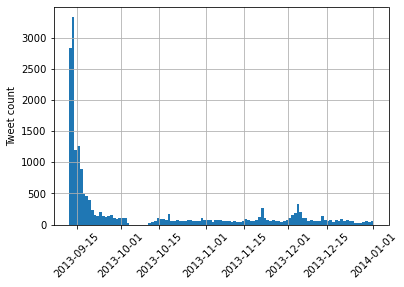

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

ax = date_tweets.hist(xrot=45,  
                          bins = (date_tweets.max() -
                                  date_tweets.min()).days)

ax.set_ylabel('Tweet count')
#ax.grid('off')
plt.show()

In [136]:
date_list = date_tweets.values.tolist()
date_list

[datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 30),
 datetime.date(2013, 12, 30),
 datetime.date(2014, 1, 1),
 datetime.date(2013, 12, 30),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2014, 1, 1),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2014, 1, 1),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2014, 1, 1),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 30),
 datetime.date(2013, 12, 30),
 datetime.date(2013, 12, 31),
 datetime.date(2014, 1, 1),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 12, 31),
 datetime.date(2013,

In [137]:
date_list.sort()
date_list

[datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date(2013, 9, 12),
 datetime.date

In [138]:
print(type(date_tweets))
date_tweets

<class 'pandas.core.series.Series'>


0        2013-12-31
1        2013-12-31
2        2013-12-30
3        2013-12-30
4        2014-01-01
            ...    
18816    2013-09-12
18817    2013-09-12
18818    2013-09-12
18819    2013-09-12
18820    2013-09-12
Name: created_at, Length: 18821, dtype: object

In [139]:
print(date_tweets, "\t", datetime_tweets)

0        2013-12-31
1        2013-12-31
2        2013-12-30
3        2013-12-30
4        2014-01-01
            ...    
18816    2013-09-12
18817    2013-09-12
18818    2013-09-12
18819    2013-09-12
18820    2013-09-12
Name: created_at, Length: 18821, dtype: object 	 0       2013-12-31 07:14:22+00:00
1       2013-12-31 18:49:31+00:00
2       2013-12-30 20:29:20+00:00
3       2013-12-30 23:02:29+00:00
4       2014-01-01 06:12:15+00:00
                   ...           
18816   2013-09-12 04:12:20+00:00
18817   2013-09-12 04:03:47+00:00
18818   2013-09-12 04:11:56+00:00
18819   2013-09-12 04:05:59+00:00
18820   2013-09-12 04:07:35+00:00
Name: created_at, Length: 18821, dtype: datetime64[ns, UTC]


In [18]:
'''
from IPython.display import HTML
HTML(pd.DataFrame(removed_stop_words).to_html())
'''

In [3]:
#!pip install nltk

In [168]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [169]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEll\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
stop_words = set(stopwords.words('english'))

In [159]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [160]:
all_tweets_no_urls = [remove_url(tweet) for tweet in text_tweets]

In [161]:
all_tweets_no_urls

['Boom bitch get out the way drunk islands girlsnight BJs hookah zephyrs boulder marines',
 'WeatherDude17 Not that revved up yet due to model inconsistency Id say 02 w a decent chance of gt1 snow COwx weather Denver',
 'Story of my life boulder',
 'Were looking for the two who came to help a cyclist after a hitandrun at 30thBaseline 11pm Dec 23rd Boulder CO',
 'Happy New Year Boulder What are some of your New Years resolutions this year',
 'simonSaysso Nearly 60 degrees in Boulder today Great place to live',
 'Deer boulder onlyinboulder',
 'NWS has only bumped up tomrorows odds for snow in Denver from 30 to 40 To me it feels like it should be closer to 60 COwx weather',
 'Wishing you the best 2014 full of joy blessing good food wine love friendship music amp art boulder bucknell denver fortcollins',
 'I never get tired of the view of PikesPeak amp Denver from ThontonParkway COwx',
 'For once HPC probabilities dont feel overdone 5060 ch gt1 snow Wed in Denver 7080 ch in Boulder COwx',


In [162]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

In [163]:
words_in_tweet

[['boom',
  'bitch',
  'get',
  'out',
  'the',
  'way',
  'drunk',
  'islands',
  'girlsnight',
  'bjs',
  'hookah',
  'zephyrs',
  'boulder',
  'marines'],
 ['weatherdude17',
  'not',
  'that',
  'revved',
  'up',
  'yet',
  'due',
  'to',
  'model',
  'inconsistency',
  'id',
  'say',
  '02',
  'w',
  'a',
  'decent',
  'chance',
  'of',
  'gt1',
  'snow',
  'cowx',
  'weather',
  'denver'],
 ['story', 'of', 'my', 'life', 'boulder'],
 ['were',
  'looking',
  'for',
  'the',
  'two',
  'who',
  'came',
  'to',
  'help',
  'a',
  'cyclist',
  'after',
  'a',
  'hitandrun',
  'at',
  '30thbaseline',
  '11pm',
  'dec',
  '23rd',
  'boulder',
  'co'],
 ['happy',
  'new',
  'year',
  'boulder',
  'what',
  'are',
  'some',
  'of',
  'your',
  'new',
  'years',
  'resolutions',
  'this',
  'year'],
 ['simonsaysso',
  'nearly',
  '60',
  'degrees',
  'in',
  'boulder',
  'today',
  'great',
  'place',
  'to',
  'live'],
 ['deer', 'boulder', 'onlyinboulder'],
 ['nws',
  'has',
  'only',
  'b

In [171]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [165]:
# List of all words across tweets with neither urls nor stop words
all_words_nsw = list(itertools.chain(*tweets_nsw))

# Create counter
counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('rt', 7884),
 ('boulder', 6958),
 ('cowx', 5329),
 ('boulderflood', 5297),
 ('coflood', 4294),
 ('colorado', 2230),
 ('denver', 1479),
 ('flood', 1284),
 ('snow', 1200),
 ('amp', 1200),
 ('weather', 1070),
 ('creek', 961),
 ('water', 884),
 ('rain', 802),
 ('today', 733)]

In [166]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])
clean_tweets_nsw.head()

words  count
0            rt   7884
1       boulder   6958
2          cowx   5329
3  boulderflood   5297
4       coflood   4294

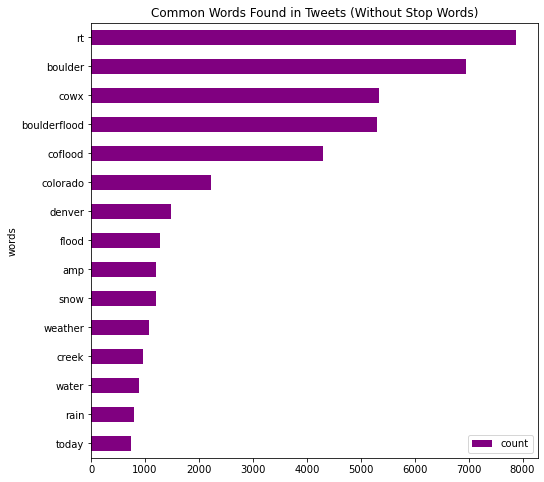

In [167]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

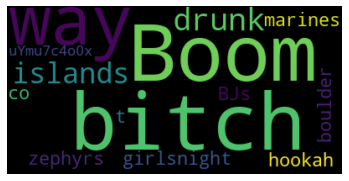

In [179]:
text = text_tweets[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

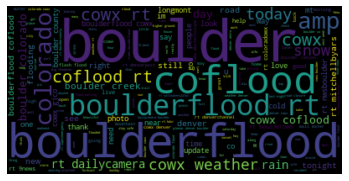

In [183]:
text = words_str

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [182]:
words_str = ' '.join([ele for ele in all_words_nsw])
words_str 

'boom bitch get way drunk islands girlsnight bjs hookah zephyrs boulder marines weatherdude17 revved yet due model inconsistency id say 02 w decent chance gt1 snow cowx weather denver story life boulder looking two came help cyclist hitandrun 30thbaseline 11pm dec 23rd boulder co happy new year boulder new years resolutions year simonsaysso nearly 60 degrees boulder today great place live deer boulder onlyinboulder nws bumped tomrorows odds snow denver 30 40 feels like closer 60 cowx weather wishing best 2014 full joy blessing good food wine love friendship music amp art boulder bucknell denver fortcollins never get tired view pikespeak amp denver thontonparkway cowx hpc probabilities dont feel overdone 5060 ch gt1 snow wed denver 7080 ch boulder cowx rt coloradowx 2 snow possible wednesday across greater denver metro area updates tomorrow cowx weather boulder last sunset boulder flatirons dushanbe teahouse ringing newyear bmoca nye factory event surrounded art warholesque fun boulder 

In [178]:
' '.join([data for ele in all_words_nsw for data in ele])

'b o o m b i t c h g e t w a y d r u n k i s l a n d s g i r l s n i g h t b j s h o o k a h z e p h y r s b o u l d e r m a r i n e s w e a t h e r d u d e 1 7 r e v v e d y e t d u e m o d e l i n c o n s i s t e n c y i d s a y 0 2 w d e c e n t c h a n c e g t 1 s n o w c o w x w e a t h e r d e n v e r s t o r y l i f e b o u l d e r l o o k i n g t w o c a m e h e l p c y c l i s t h i t a n d r u n 3 0 t h b a s e l i n e 1 1 p m d e c 2 3 r d b o u l d e r c o h a p p y n e w y e a r b o u l d e r n e w y e a r s r e s o l u t i o n s y e a r s i m o n s a y s s o n e a r l y 6 0 d e g r e e s b o u l d e r t o d a y g r e a t p l a c e l i v e d e e r b o u l d e r o n l y i n b o u l d e r n w s b u m p e d t o m r o r o w s o d d s s n o w d e n v e r 3 0 4 0 f e e l s l i k e c l o s e r 6 0 c o w x w e a t h e r w i s h i n g b e s t 2 0 1 4 f u l l j o y b l e s s i n g g o o d f o o d w i n e l o v e f r i e n d s h i p m u s i c a m p a r t b o u l d e r b u c k n e l l

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DEll\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [125]:
example_sent = text_tweets[1]
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if w.lower() not in stop_words]

print(word_tokens)
print(filtered_sentence)

['@', 'WeatherDude17', 'Not', 'that', 'revved', 'up', 'yet', 'due', 'to', 'model', 'inconsistency', '.', 'I', "'d", 'say', '0-2', "''", 'w/', 'a', 'decent', 'chance', 'of', '&', 'gt', ';', '1', "''", '#', 'snow', '#', 'COwx', '#', 'weather', '#', 'Denver']
['@', 'WeatherDude17', 'revved', 'yet', 'due', 'model', 'inconsistency', '.', "'d", 'say', '0-2', "''", 'w/', 'decent', 'chance', '&', 'gt', ';', '1', "''", '#', 'snow', '#', 'COwx', '#', 'weather', '#', 'Denver']


In [105]:
filtered_sentence12 = [word for tweet in text_tweets 
                       for word in word_tokenize(tweet) 
                       if word.lower() not in stop_words]

In [52]:
list_word_tokens = [word_tokenize(tweet) for tweet in text_tweets]
list_word_tokens

[['Boom',
  'bitch',
  'get',
  'out',
  'the',
  'way',
  '!',
  '#',
  'drunk',
  '#',
  'islands',
  '#',
  'girlsnight',
  '#',
  'BJs',
  '#',
  'hookah',
  '#',
  'zephyrs',
  '#',
  'boulder',
  '#',
  'marines…',
  'http',
  ':',
  '//t.co/uYmu7c4o0x'],
 ['@',
  'WeatherDude17',
  'Not',
  'that',
  'revved',
  'up',
  'yet',
  'due',
  'to',
  'model',
  'inconsistency',
  '.',
  'I',
  "'d",
  'say',
  '0-2',
  "''",
  'w/',
  'a',
  'decent',
  'chance',
  'of',
  '&',
  'gt',
  ';',
  '1',
  "''",
  '#',
  'snow',
  '#',
  'COwx',
  '#',
  'weather',
  '#',
  'Denver'],
 ['Story',
  'of',
  'my',
  'life',
  '!',
  '😂',
  '#',
  'boulder',
  'http',
  ':',
  '//t.co/ZMfNKEl0xD'],
 ['We',
  "'re",
  'looking',
  'for',
  'the',
  'two',
  'who',
  'came',
  'to',
  'help',
  'a',
  'cyclist',
  'after',
  'a',
  'hit-and-run',
  'at',
  '30th/Baseline',
  '~11pm',
  'Dec',
  '23rd',
  '#',
  'Boulder',
  '#',
  'CO',
  'http',
  ':',
  '//t.co/zyk3FkB4og'],
 ['Happy',
  'New

In [ ]:
list_word_tokens = [[word_tokenize(tweet) for tweet in text_tweets]
                    for word in tweet_words if word not in stop_words]

In [ ]:
list_word_tokens = [[word_tokenize(tweet) for tweet in text_tweets]
                    for word in tweet_words if word not in stop_words]
list_word_tokens